In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data (raw file)

In [2]:
### set file directory
fdiry = file.path(FD_RES, "source", "MPRA", "Tewhey_TMPRA", "tiling_counts")
fname = "OL13_20220512_counts.out"
fpath = file.path(fdiry, fname)

### import data
dat = read.table(fpath, row.names=1)
dat = dat %>% rownames_to_column(var = "Name")

### rename columns & assign
cnames = c("Name", paste0("Input.rep", 1:4), paste0("Output.rep", 1:4))
colnames(dat) = cnames
dat_fads_raw = dat

### show
print(dim(dat))
cat("++++++++++++++++++++++++++++++++++++++++\n")
print(head(dat))
cat("++++++++++++++++++++++++++++++++++++++++\n")
print(tail(dat))

[1] 55229     9
++++++++++++++++++++++++++++++++++++++++
                                               Name Input.rep1 Input.rep2
1       (11:61555216-61555415;11:61555315:T:C_A_wC)       1609       1221
2 (11:61555231-61555430_RC;11:61555330:T:C_A_wC_RC)       1179        582
3 (11:61555315:T:C_A_wC_RC;11:61555216-61555415_RC)       1066        643
4       (11:61555330:T:C_A_wC;11:61555231-61555430)       1063        701
5 (11:61555366-61555565_RC;11:61555465:A:G_A_wC_RC)       1239        722
6       (11:61555366-61555565;11:61555465:A:G_A_wC)       1362        885
  Input.rep3 Input.rep4 Output.rep1 Output.rep2 Output.rep3 Output.rep4
1       1396        798         845         283         574        1223
2       1225        721         476         416         912         956
3       1206        681         470         846         540         847
4        786        416         357         568         599         518
5       1341        682         311         421         604      

## Import data (processed file)

In [5]:
### set file directory
fdiry = file.path(FD_RES, "source", "MPRA", "syn22348180")
fname = "FADS_Tile_K562_K562_20200905.bed"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show info
dat_fads_v1 = dat
print(dim(dat))
head(dat)

Rows: 57010 Columns: 15
── Column specification ───────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): id, score, strand, cigar, md-tag, project
dbl (9): chr, start, stop, log2fc, input-count, output-count, log10pval, log...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 57010    15


chr,start,stop,id,score,strand,log2fc,input-count,output-count,log10pval,log10fdr,lfc-se,cigar,md-tag,project
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
11,61554801,61555000,11:61554801-61555000,.,+,-0.8576390,539.0699,297.7152,0.9314836,0.43422007,0.5472744,200=,200,Tiles
11,61554801,61555000,11:61554801-61555000_RC,.,-,-0.8816736,325.8447,176.7425,0.6629859,0.24698506,0.7145996,200=,200,Tiles
11,61554806,61555005,11:61554806-61555005,.,+,-0.7791248,609.2923,355.0390,0.8632774,0.38343441,0.5239386,200=,200,Tiles
11,61554806,61555005,11:61554806-61555005_RC,.,-,-0.8319054,336.9266,189.0981,0.2785033,0.06727408,1.3138630,200=,200,Tiles
11,61554811,61555010,11:61554811-61555010,.,+,-0.3964017,643.6583,489.5357,0.2609375,0.06229715,0.6604212,200=,200,Tiles
11,61554811,61555010,11:61554811-61555010_RC,.,-,-0.3913234,310.1877,236.2906,0.1807929,0.04025238,0.8881207,200=,200,Tiles


In [6]:
### set file directory
fdiry = file.path(FD_RES, "source", "MPRA", "syn22348180")
fname = "FADS_Tile_K562_K562_20200905.hg38.txt"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show info
dat_fads_v2 = dat
print(dim(dat))
head(dat)

Rows: 57010 Columns: 15
── Column specification ───────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): chr, id, score, strand, cigar, md-tag, project
dbl (8): start, stop, log2fc, input-count, output-count, log10pval, log10fdr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 57010    15


chr,start,stop,id,score,strand,log2fc,input-count,output-count,log10pval,log10fdr,lfc-se,cigar,md-tag,project
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr11,61787329,61787528,11:61554801-61555000,.,+,-0.8576390,539.0699,297.7152,0.9314836,0.43422007,0.5472744,200=,200,Tiles
chr11,61787329,61787528,11:61554801-61555000_RC,.,-,-0.8816736,325.8447,176.7425,0.6629859,0.24698506,0.7145996,200=,200,Tiles
chr11,61787334,61787533,11:61554806-61555005,.,+,-0.7791248,609.2923,355.0390,0.8632774,0.38343441,0.5239386,200=,200,Tiles
chr11,61787334,61787533,11:61554806-61555005_RC,.,-,-0.8319054,336.9266,189.0981,0.2785033,0.06727408,1.3138630,200=,200,Tiles
chr11,61787339,61787538,11:61554811-61555010,.,+,-0.3964017,643.6583,489.5357,0.2609375,0.06229715,0.6604212,200=,200,Tiles
chr11,61787339,61787538,11:61554811-61555010_RC,.,-,-0.3913234,310.1877,236.2906,0.1807929,0.04025238,0.8881207,200=,200,Tiles


## Question: what are the projects?

In [14]:
dat = dat_fads_v1
dat = dat %>% dplyr::select(chr, start, stop, id, project) %>% distinct

table(dat$chr, dat$project)

    
     emVarCtrl expCtrl negCtrl   SNV Tiles
  1          0       0      16     0     0
  2          2       1       7     0     0
  3          0       0      17     0     0
  4          6       0       5     0     0
  5          0       0      11     0     0
  6          2       1      10     0     0
  7          2       0       9     0     0
  8          4       1       6     0     0
  9          4       1       8     0     0
  10         2       1       6     0     0
  11         0       0      14 12432 44330
  12         4       0       6     0     0
  13         2       0       3     0     0
  14         0       2       8     0     0
  15         8       1       3     0     0
  16         2       2       4     0     0
  17        16       4       3     0     0
  18         2       0       6     0     0
  19        16       2       5     0     0
  20         0       2       1     0     0
  21         0       0       1     0     0
  22         8       0       1     0     0

In [15]:
dat = dat_fads_v2
dat = dat %>% dplyr::select(chr, start, stop, id, project) %>% distinct

table(dat$chr, dat$project)

       
        emVarCtrl expCtrl negCtrl   SNV Tiles
  chr1          0       0      16     0     0
  chr10         2       1       6     0     0
  chr11         0       0      14 12432 44330
  chr12         4       0       6     0     0
  chr13         2       0       3     0     0
  chr14         0       2       8     0     0
  chr15         8       1       3     0     0
  chr16         2       2       4     0     0
  chr17        16       4       3     0     0
  chr18         2       0       6     0     0
  chr19        16       2       5     0     0
  chr2          2       1       7     0     0
  chr20         0       2       1     0     0
  chr21         0       0       1     0     0
  chr22         8       0       1     0     0
  chr3          0       0      17     0     0
  chr4          6       0       5     0     0
  chr5          0       0      11     0     0
  chr6          2       1      10     0     0
  chr7          2       0       9     0     0
  chr8          4       1 

## Question: what are the ranges?

In [24]:
dat = dat_fads_v1
dat = dat %>% 
    dplyr::filter(project == "Tiles") %>% 
    dplyr::select(chr, start, stop, id) %>% 
    distinct

print(unique(dat$chr))
summary(dat)

[1] 11


      chr         start               stop               id           
 Min.   :11   Min.   :61554801   Min.   :61555000   Length:44330      
 1st Qu.:11   1st Qu.:61582506   1st Qu.:61582705   Class :character  
 Median :11   Median :61610211   Median :61610410   Mode  :character  
 Mean   :11   Mean   :61610211   Mean   :61610410                     
 3rd Qu.:11   3rd Qu.:61637916   3rd Qu.:61638115                     
 Max.   :11   Max.   :61665621   Max.   :61665820                     

In [17]:
dat = dat_fads_v2
dat = dat %>% 
    dplyr::filter(project == "Tiles") %>% 
    dplyr::select(chr, start, stop, id) %>% 
    distinct

print(unique(dat$chr))
summary(dat)

[1] "chr11"


     chr                start               stop               id           
 Length:44330       Min.   :61787329   Min.   :61787528   Length:44330      
 Class :character   1st Qu.:61815034   1st Qu.:61815233   Class :character  
 Mode  :character   Median :61842739   Median :61842938   Mode  :character  
                    Mean   :61842739   Mean   :61842938                     
                    3rd Qu.:61870444   3rd Qu.:61870643                     
                    Max.   :61898149   Max.   :61898348                     

Warning message:
“Removed 420 rows containing missing values (`geom_point()`).”


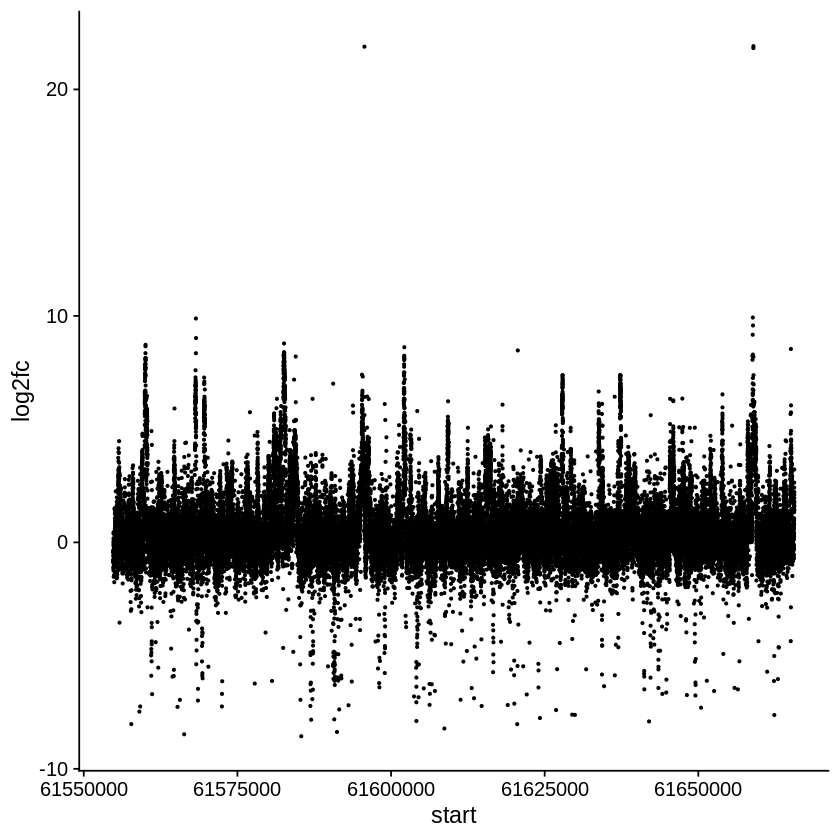

In [26]:
dat = dat_fads_v1
dat = dat %>% 
    dplyr::filter(project == "Tiles") %>% 
    dplyr::select(chr, start, stop, id, log2fc) %>% 
    distinct

gpt = ggplot(dat, aes(x=start, y = log2fc)) + geom_point(size = 0.5) + theme_cowplot()
print(gpt)

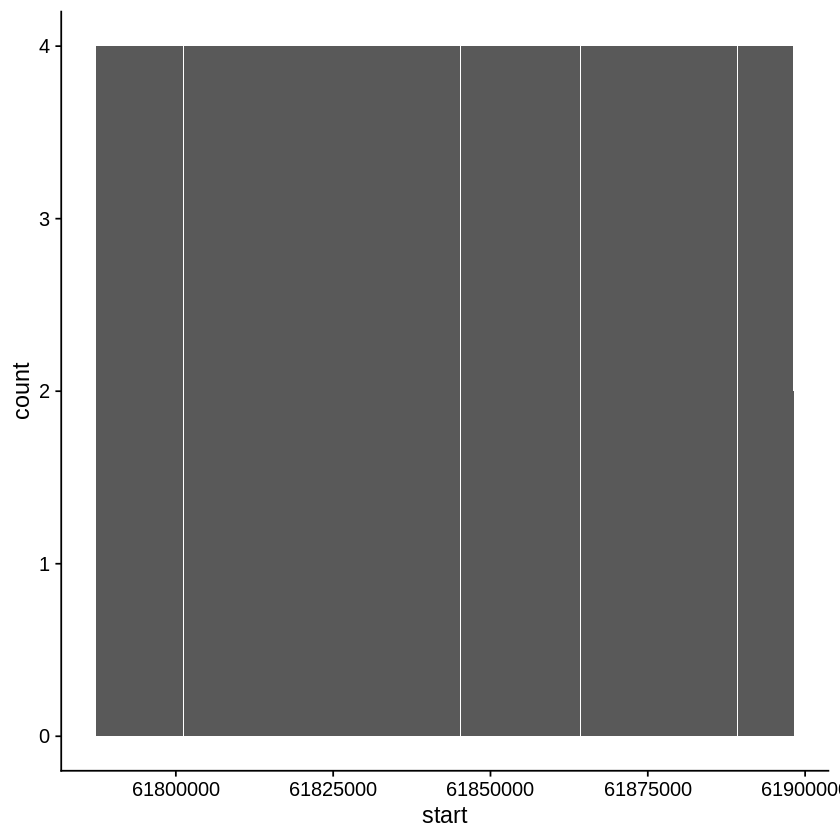

In [22]:
dat = dat_fads_v2
dat = dat %>% 
    dplyr::filter(project == "Tiles") %>% 
    dplyr::select(chr, start, stop, id) %>% 
    distinct

gpt = ggplot(dat, aes(x=start)) + geom_histogram(binwidth = 10) + theme_cowplot()
print(gpt)

In [ ]:
dat = dat_fads_v2
dat = dat %>% 
    dplyr::filter(project == "Tiles") %>% 
    dplyr::select(chr, start, stop, id) %>% 
    distinct

gpt = ggplot(dat, aes(x=start)) + geom_histogram(binwidth = 10) + theme_cowplot()
print(gpt)